In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras import Model
import os


In [6]:
train_img_path='E:\deep learning\datasets\data\PokemonData'


In [8]:
model=tf.keras.models.Sequential([
    Conv2D(16,(3,3),input_shape=(238, 226, 3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
 
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),

    Dense(150,activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 236, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 118, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 116, 110, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46592)             0

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [11]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_datagen=ImageDataGenerator(rescale=1/255,
           rotation_range=40,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True,
           )

In [12]:
train_img=img_datagen.flow_from_directory(train_img_path,
                                         target_size=(238,226),
                                         class_mode='sparse',
                                         batch_size=64)

Found 6820 images belonging to 150 classes.


In [13]:
model.fit_generator(train_img,
                  steps_per_epoch=100,
                  epochs=35)

Epoch 1/35
100/100 [==============================] - 278s 3s/step - loss: 4.8912 - acc: 0.0129
Epoch 2/35
100/100 [==============================] - 278s 3s/step - loss: 4.4406 - acc: 0.0308
Epoch 3/35
100/100 [==============================] - 277s 3s/step - loss: 4.0212 - acc: 0.0676
Epoch 4/35
100/100 [==============================] - 279s 3s/step - loss: 3.5911 - acc: 0.1089
Epoch 5/35
100/100 [==============================] - 279s 3s/step - loss: 3.2994 - acc: 0.1582
Epoch 6/35
100/100 [==============================] - 275s 3s/step - loss: 3.0616 - acc: 0.1995
Epoch 7/35
100/100 [==============================] - 272s 3s/step - loss: 2.8696 - acc: 0.2359
Epoch 8/35
100/100 [==============================] - 273s 3s/step - loss: 2.6739 - acc: 0.2789
Epoch 9/35
100/100 [==============================] - 275s 3s/step - loss: 2.5878 - acc: 0.2966
Epoch 10/35
100/100 [==============================] - 276s 3s/step - loss: 2.4540 - acc: 0.3277
Epoch 11/35
100/100 [==================

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
img=image.load_img('E:/deep learning/datasets/data/PokemonData/Abra/2eb2a528f9a247358452b3c740df69a0.jpg')

In [17]:
img1=image.img_to_array(img)

In [18]:
img1.shape

(238, 226, 3)

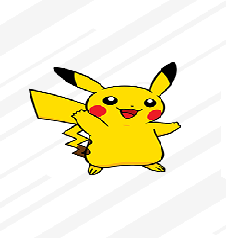

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img('pok.png',target_size=(238,226))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict_classes(images,batch_size=2)
img

In [25]:
import pandas as pd
pokemons=os.listdir('E:/deep learning/datasets/data/PokemonData')
pokemons=pd.Series(pokemons)
for i in range(151):
    if classes==i:
        print('this is {}'.format(pokemons[i]))
        


this is Pikachu


In [26]:
model.save('pokemon_classifier.h5')